In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
mean = 0
std = 10
gradient = 2

In [28]:
xs = np.arange(0,100)
ys = gradient * np.arange(0, len(xs)) + np.random.normal(mean, std, len(xs))

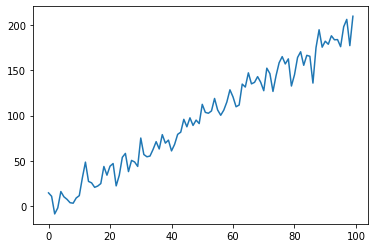

In [29]:
plt.plot(xs, ys)

In [30]:
np_coeff = np.polyfit(xs, ys, deg=1)
np_coeff

array([ 2.01409638, -2.56458749])

In [31]:
np_fit = np.polyval(np_coeff, xs)

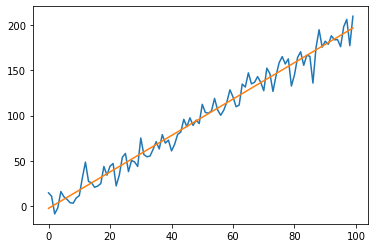

In [33]:
plt.plot(xs, ys)
plt.plot(xs, np_fit)

In [36]:
best_fit_slope = (np.mean(xs) * np.mean(ys) - np.mean(xs * ys))/(np.mean(xs)**2 - np.mean(xs**2))
best_fit_slope

2.0140963835190475

In [38]:
best_fit_int = np.mean(ys) - best_fit_slope * np.mean(xs)
best_fit_int

-2.5645874939584274

# Speed Test

In [44]:
for i in range(10000):
    np.polyfit(xs, ys, deg=1)

In [45]:
for i in range(10000):
    best_fit_slope = (np.mean(xs) * np.mean(ys) - np.mean(xs * ys))/(np.mean(xs)**2 - np.mean(xs**2))


# Speed Test Grid

## Setup

In [347]:
from numpy.typing import ArrayLike
import xarray as xr
import cftime
from importlib import reload

In [338]:
def generate_mock_dataset(input_mock_values:ArrayLike) -> xr.DataArray:
    t0 = cftime.datetime(1, 1, 1, 0, 0, 0, 0, calendar='gregorian')

    lat = np.linspace(-25, -10, 10)
    lon = np.linspace(110, 135, 20)

    time = xr.cftime_range(start=t0, periods=len(input_mock_values), freq='1Y')

    mock_values = np.array([np.array([input_mock_values for _ in lat]) for _ in lon])

    mock_da = xr.Dataset({'tas':(('lon', 'lat', 'time'), mock_values)},
                         {'lat':lat, 'lon':lon,'time':time}).to_array(name='tas').squeeze()
    
    return mock_da

In [339]:
number_points = 100
gradient = 2
window = 30
min_periods = window

In [376]:
reload(xca)

<module 'xarray_class_accessors' from '/home/563/ab2313/Documents/PhD/modules/xarray_class_accessors.py'>

In [375]:
input_mock_values = np.arange(0, number_points) * gradient
mock_da = generate_mock_dataset(input_mock_values)

In [374]:
window=31

In [377]:
mock_da.sn.rolling_signal(window=window)

NameError: name '_SignalToNoise__grid_gradient' is not defined

In [344]:
mock_da.sn.calculate_rolling_signal(window=window)

<xarray.DataArray 'signal' (window: 1, lon: 20, lat: 10, time: 70)>
array([[[[62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         ...,
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.]],

        [[62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         ...,
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.]],

        [[62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         ...,
...
         ...,
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.]],

        [[62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         ...,
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.]],

        [[62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         ...,
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.],
         [62., 62., 62., ..., 62., 62., 62.]]]])
Coordinates:
  * lat       (lat) float64 -25.0 -23.33 -21.67 -20.0 ... -13.33 -11.67 -10.0
  * lon       (lon) float64 110.0 111.3 112.6 113.9 ... 131.1 132.4 133.7 135.0
  * time      (time) object 0001-12-31 00:00:00 ... 0070-12-31 00:00:00
    variable  <U3 'tas'
  * window    (window) int64 31

## Test

In [333]:
import sys
sys.path.append('../')
import constants
sys.path.append(constants.MODULE_DIR)

In [336]:
import xarray_class_accessors as xca

# No Import of XCA

In [58]:
def trend_line(x, use = [0][0]):
    if all(~np.isfinite(x)):
        return np.nan

    t = np.arange(len(x))

    # Getting the gradient of a linear interpolation
    idx = np.isfinite(x) #checking where the nans.
    x = x[idx]
    t = t[idx]

    if len(x) < 3:
        return np.nan

    poly = np.polyfit(t,x,1)

    return poly[use]

def _apply_along_helper(arr, axis, func1d,logginglevel='ERROR'):
    axis = axis if isinstance(axis, int) else axis[0]

    # func1ds, axis, arr 
    return np.apply_along_axis(func1d, axis, arr)

In [63]:
signal_da = mock_da.rolling(time = window, min_periods = min_periods, center = True)\
    .reduce(_apply_along_helper, func1d = trend_line) * window

In [258]:
def mult_func(arr, arr2):
    return arr * arr2

def calculate_grad(arr, axis):
    print(f'arr={arr.shape}')
    xs = np.arange(arr.shape[axis])
    
    xs_mult_arr = np.apply_along_axis(mult_func, axis=axis, arr=arr, arr2=xs)
    denominator = np.mean(xs) **2 - np.mean(xs**2)
    
    t1 = np.nanmean(xs) * np.nanmean(arr, axis=axis)
    t2 = np.nanmean(xs_mult_arr, axis=axis)
    numerator = (t1-t2)
    print(f't1={t1.shape}, t2={t2.shape}')
    print(f'den = {denominator}')
    result = numerator/denominator
    print(f'result={result.shape}')
    return result

In [318]:
window=30

In [149]:
time_axis_num = mock_da.get_axis_num('time')
time_axis_num

2

In [327]:
mock_sig_01 = mock_da.rolling(time=window, min_periods=min_periods,center=True).reduce(calculate_grad) * window

arr=(20, 10, 100, 30)
t1=(20, 10, 100), t2=(20, 10, 100)
den = -74.91666666666669
result=(20, 10, 100)


In [328]:
signal_da.isel(lat=0, lon=0)

<xarray.DataArray 'tas' (time: 100)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
    lat       float64 -25.0
    lon       float64 110.0
  * time      (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
    variable  <U3 'tas'

In [329]:
mock_sig_01.isel(lat=0, lon=0)

<xarray.DataArray 'tas' (time: 100)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
    lat       float64 -25.0
    lon       float64 110.0
  * time      (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
    variable  <U3 'tas'

# Prototyping

In [150]:
ys = mock_da.values
ys.shape

(20, 10, 100)

In [293]:
ys[...,:30].shape

(20, 10, 30)

In [294]:
ys = ys[...,:30]

In [295]:
xs = np.arange(ys.shape[time_axis_num])
xs.shape

(30,)

In [296]:
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [297]:
applied = np.apply_along_axis(mult_func, axis=time_axis_num, arr=ys, arr2=xs)

In [298]:
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [299]:
ys[0,0,:]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58])

In [300]:
applied[0,0,:]

array([   0,    2,    8,   18,   32,   50,   72,   98,  128,  162,  200,
        242,  288,  338,  392,  450,  512,  578,  648,  722,  800,  882,
        968, 1058, 1152, 1250, 1352, 1458, 1568, 1682])

In [301]:
xs_mult_ys = np.apply_along_axis(mult_func, axis=time_axis_num, arr=ys, arr2=xs)

In [302]:
(np.mean(xs) * np.mean(ys, axis=time_axis_num)).shape

(20, 10)

In [304]:
np.mean(xs) **2 - np.mean(xs**2)

-74.91666666666669

In [305]:
np.polyfit(xs, ys[0,0,:], 1)

array([2.00000000e+00, 2.59453523e-15])

In [306]:
(np.mean(xs) * np.mean(ys, axis=time_axis_num) - np.mean(xs_mult_ys, axis=time_axis_num))/(np.mean(xs) **2 - np.mean(xs**2))

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [278]:
td = mock_da.rolling(time=window, min_periods=min_periods,center=True).construct('window_dim')

In [290]:
td.mean(dim='window_dim')

<xarray.DataArray 'tas' (lon: 20, lat: 10, time: 100)>
array([[[  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        ...,
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.]],

       [[  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        ...,
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.]],

       [[  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        ...,
...
        ...,
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.]],

       [[  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        ...,
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.]],

       [[  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        ...,
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.],
        [  2.,   3.,   4., ..., 194., 195., 196.]]])
Coordinates:
  * lat       (lat) float64 -25.0 -23.33 -21.67 -20.0 ... -13.33 -11.67 -10.0
  * lon       (lon) float64 110.0 111.3 112.6 113.9 ... 131.1 132.4 133.7 135.0
  * time      (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
    variable  <U3 'tas'

In [289]:
mock_da.isel(lat=0, lon=0, time=3)

<xarray.DataArray 'tas' ()>
array(6)
Coordinates:
    lat       float64 -25.0
    lon       float64 110.0
    time      object 0004-12-31 00:00:00
    variable  <U3 'tas'

In [288]:
td.isel(lat=0, lon=0, time=3)

<xarray.DataArray 'tas' (window_dim: 5)>
array([ 2.,  4.,  6.,  8., 10.])
Coordinates:
    lat       float64 -25.0
    lon       float64 110.0
    time      object 0004-12-31 00:00:00
    variable  <U3 'tas'
Dimensions without coordinates: window_dim

In [320]:
mock_sig_01.isel(lat=1, lon=0)

<xarray.DataArray 'tas' (time: 100)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
    lat       float64 -23.33
    lon       float64 110.0
  * time      (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
    variable  <U3 'tas'

In [255]:
mock_da.rolling(time=window, min_periods=min_periods,center=True).reduce(calculate_grad,
                                                                         time_axis_num=time_axis_num)

arr=(20, 10, 100, 30)
t1=(20, 10, 100), t2=(20, 10, 100)
den = -74.91666666666669
result=(20, 10, 100)


<xarray.DataArray 'tas' (lon: 20, lat: 10, time: 100)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat       (lat) float64 -25.0 -23.33 -21.67 -20.0 ... -13.33 -11.67 -10.0
  * lon       (lon) float64 110.0 111.3 112.6 113.9 ... 131.1 132.4 133.7 135.0
  * time      (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
    variable  <U3 'tas'

In [243]:
def add_1(arr, axis, time_axis_num):
    print(arr.shape)
    return arr + 1

In [253]:
window

30

In [245]:
_=mock_da.rolling(time=window, min_periods=min_periods,center=True).reduce(add_1,
                                                                         time_axis_num=time_axis_num)

(20, 10, 100, 30)
